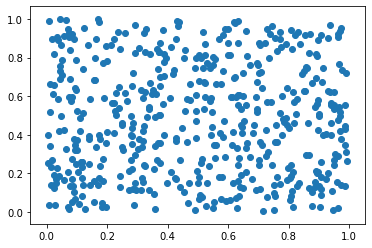

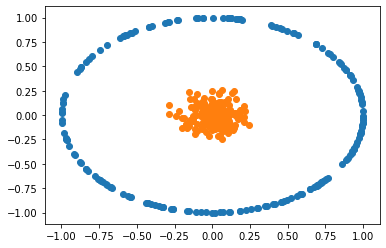

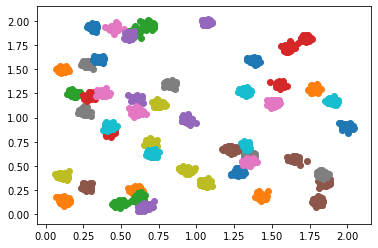

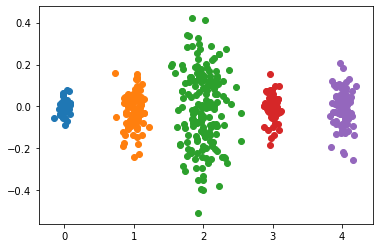

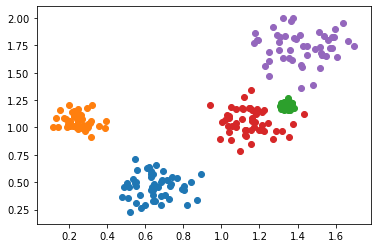

In [60]:
#https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline
fig = plt.figure()
    
#non-clustered data
    
n=500 
np.random.seed(42) 
 
X=np.random.uniform(0,1,n)
Y=np.random.uniform(0,1,n)    

data1=np.concatenate((X.reshape(-1,1),Y.reshape(-1,1)),axis=1)

plt.scatter(X,Y) 
plt.show() 

# non-spherical data

n=200

theta = np.random.uniform(0,2*np.pi,n)
X_circle=np.cos(theta)
Y_circle=np.sin(theta)

mu=0
sigma=0.1

X_center=np.random.normal(mu,sigma,n)
Y_center=np.random.normal(mu,sigma,n)

X=np.concatenate((X_circle,X_center))
Y=np.concatenate((Y_circle,Y_center))

data2=np.concatenate((X.reshape(-1,1),Y.reshape(-1,1)),axis=1)

plt.scatter(X_circle,Y_circle)
plt.scatter(X_center, Y_center) 
plt.show() 


# many clusters

sigma=0.02
n=50
data3=np.array([], dtype=np.int64).reshape(0,2) #empty array

for i in range(n):
    mu1=np.random.uniform(0,2)
    mu2=np.random.uniform(0,2)
    
    X=np.random.normal(mu1,sigma,n)
    Y=np.random.normal(mu2,sigma,n)
   
    plt.scatter(X,Y)
    XY=np.concatenate((X.reshape(-1,1),Y.reshape(-1,1)),axis=1)
    data3=np.concatenate((data3,XY),axis=0)
    

plt.show()


# different cluster sizes

mus=range(0,5)
sigma=0.001
data4=np.array([], dtype=np.int64).reshape(0,2)

for mu in mus:
    n=np.random.randint(20,200)
    scaled_sigma=sigma*n
    #print(n,scaled_sigma)
    
    X=np.random.normal(mu,scaled_sigma,n)
    Y=np.random.normal(0,scaled_sigma,n)
    plt.scatter(X,Y)
    XY=np.concatenate((X.reshape(-1,1),Y.reshape(-1,1)),axis=1)
    data4=np.concatenate((data4,XY),axis=0)
    
plt.show()


# different cluster densities

n=50
data5=np.array([], dtype=np.int64).reshape(0,2)

for i in range(0,5):
    mu1=np.random.uniform(0,2)
    mu2=np.random.uniform(0,2)
    sigma=np.random.uniform(0.01,0.15)
    #print(sigma)
    
    X=np.random.normal(mu1,sigma,n)
    Y=np.random.normal(mu2,sigma,n)
    plt.scatter(X,Y)
    XY=np.concatenate((X.reshape(-1,1),Y.reshape(-1,1)),axis=1)
    data5=np.concatenate((data5,XY),axis=0)

plt.show()
  


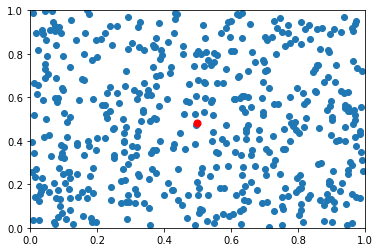

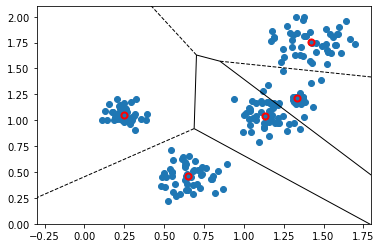

In [57]:

# k-means visual inspection

from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

k=[1,2,50,5,5]
xlim=[[0,1],[-1,1],[0,2],[-1,5],[-0.3,1.8]]
ylim=[[0,1],[-1,1],[-0.2,2.2],[-0.6,0.5],[0,2.1]]

for i in range(1,6): #less than 3 points not enough to construct voronoi plot
    dataset="data%d" % i    
    
    kmeans = KMeans(n_clusters=k[i-1], init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(eval(dataset))
    
    if i >=3:
        vor = Voronoi(kmeans.cluster_centers_)
        voronoi_plot_2d(vor, show_vertices=False)
    plt.scatter(eval(dataset)[:,0], eval(dataset)[:,1])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
    plt.xlim(xlim[i-1]), plt.ylim(ylim[i-1])
    plt.show()


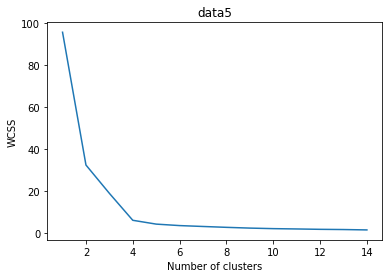

In [7]:
kmax=15

for j in range(1,6):
    wcss = []
    data="data%d" % j
    for i in range(1, kmax):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(eval(data))
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, kmax), wcss)
    plt.title(data)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

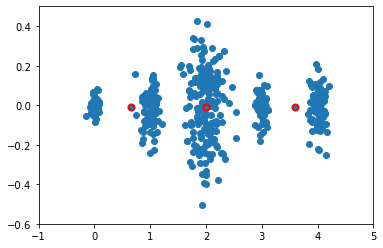

In [69]:

# k-means elbow method

k=[4,5,5,3,4] # k from inspecting elbow plots
xlim=[[-0.1,1.1],[-1.1,1.1],[0,2],[-1,5],[-0.3,1.8]]
ylim=[[-0.1,1.1],[-1.1,1.1],[-0.2,2.2],[-0.6,0.5],[0,2.1]]

for i in range(1,6):
    dataset="data%d" % i    
    
    kmeans = KMeans(n_clusters=k[i-1], init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(eval(dataset))
    vor = Voronoi(kmeans.cluster_centers_)
    voronoi_plot_2d(vor, show_vertices=False)
    plt.scatter(eval(dataset)[:,0], eval(dataset)[:,1])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
    plt.xlim(xlim[i-1]), plt.ylim(ylim[i-1])
    plt.show()


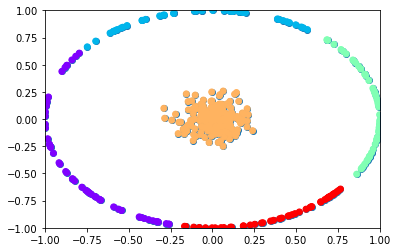

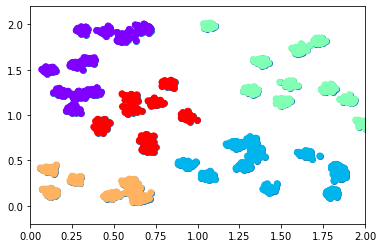

In [68]:
#hierarchical clustering, linkage=ward

from sklearn.cluster import AgglomerativeClustering

k=[4,5,5,3,4]
#k=[1,2,50,5,5]

for i in range(1,6):
    dataset="data%d" % i 
    cluster = AgglomerativeClustering(n_clusters=k[i-1], affinity='euclidean', linkage='ward')
    cluster.fit_predict(eval(dataset))
    #vor = Voronoi(kmeans.cluster_centers_)  #couldn't access coordinates of centroids, so instead plotted points in each cluster with separate colors
    #voronoi_plot_2d(vor, show_vertices=False)
    plt.scatter(eval(dataset)[:,0], eval(dataset)[:,1])
    plt.scatter(eval(dataset)[:,0], eval(dataset)[:,1], c=cluster.labels_, cmap='rainbow')
    plt.xlim(xlim[i-1]), plt.ylim(ylim[i-1])
    plt.show()



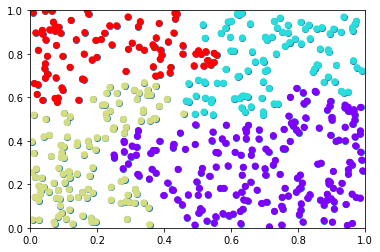

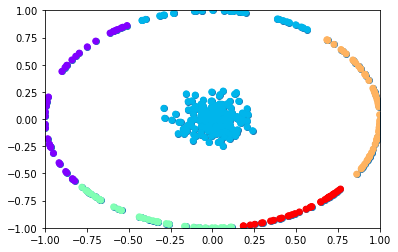

In [66]:
#hierarchical clustering, linkage complete

from sklearn.cluster import AgglomerativeClustering

k=[4,5,5,3,4]

for i in range(1,6):
    dataset="data%d" % i 
    cluster = AgglomerativeClustering(n_clusters=k[i-1], affinity='euclidean', linkage='complete')
    cluster.fit_predict(eval(dataset))
    #vor = Voronoi(kmeans.cluster_centers_)
    #voronoi_plot_2d(vor, show_vertices=False)
    plt.scatter(eval(dataset)[:,0], eval(dataset)[:,1])
    plt.scatter(eval(dataset)[:,0], eval(dataset)[:,1], c=cluster.labels_, cmap='rainbow')
    #plt.scatter(cluster.labels_[:,0],cluster.labels_[:,1],c='red', s=50)
    plt.xlim(xlim[i-1]), plt.ylim(ylim[i-1])
    plt.show()

